# Chapter 3: 비지도 학습과 데이터 전처리
---

비지도학습: 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 머신러닝

### 3.1 비지도 학습의 종류
* 비지도 변환: 데이터를 새롭게 표현하여 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
    * 차원 축소
    * 데이터를 구성하는 단위나 성분 탐색
* 군집 알고리즘: 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2 비지도 학습의 도전 과제
* 알고리즘 평가가 어렵다. -> 직접확인이 유일한 방법일 때가 많음.
* 지도학습의 전처리 단계에서 비지도 학습이 사용된다. (비지도 학습의 결과로 데이터 새롭게 표현된 데이터가 용이하기 때문)

### 3.3 데이터 전처리와 스케일 조정

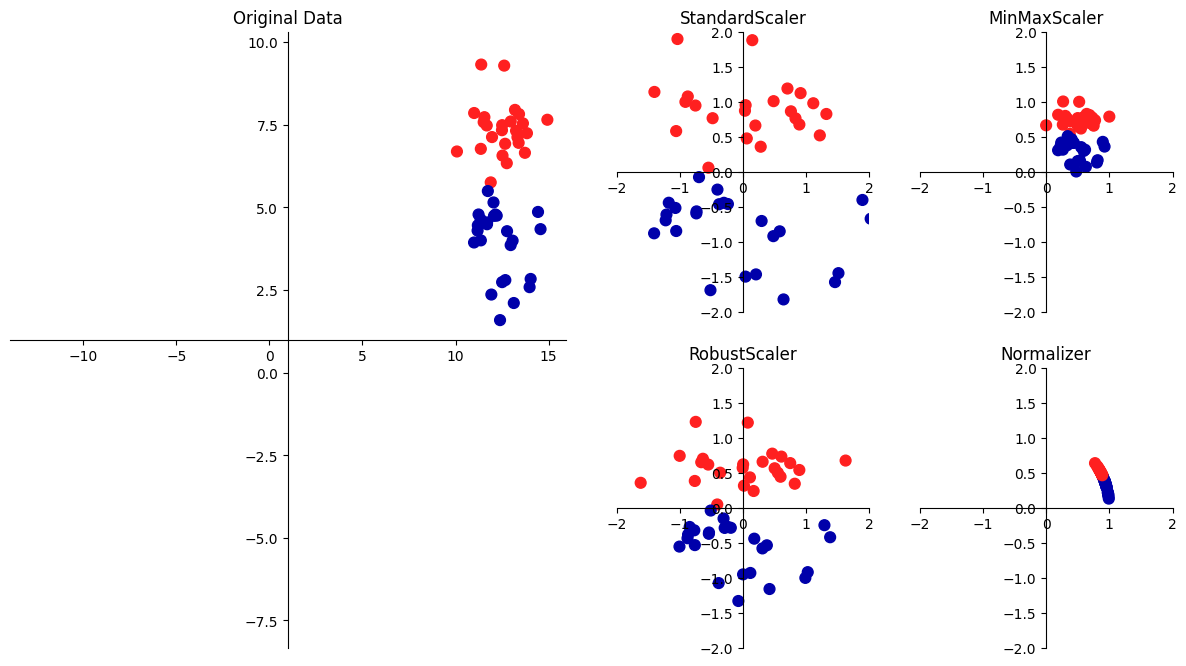

In [1]:
import mglearn

mglearn.plots.plot_scaling()

#### 3.3.1 여러 가지 전처리 방법

* StandardScaler: 각 특성의 평균을 0, 분산을 1로 변경
* RoubtScaler: 평균과 분산 대신 중간 값과 사분위 값을 사용 -> 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않음.
* MinMaxScaler: 모든 특성이 0과 1사이에 있도록 변경 ($\frac {x-x_{min}} {x_{max}-x_{min}} $)
* Normalizer: 특성 벡터의 유클라디안 길이가 1이 되도록 데이터 포인트를 조정 (데이터 방향만 중요할 때 쓰임)

#### 3.3.2 데이터 변환 적용하기


In [2]:
# 훈련 세트와 테스트 세트로 분배
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
# MinMaxSclaer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # 데이터 특성의 최솟값과 최댓값을 계산

MinMaxScaler()

In [4]:
# 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 데이터셋의 속성을 출력
print("스케일 조정 후 특성별 최솟값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최댓값:\n", X_test_scaled.min(axis=0))


스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


```transform()```은 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나누기 때문에 테스트 세트에 적용할 경우 [0,1]을 벗어날 수 있다.

#### 3.3 Quantile Transformer와 Power Transformer
* Quantile Transformer: 1,000개의 분위를 사용하여 데이터를 균등하게 분포

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

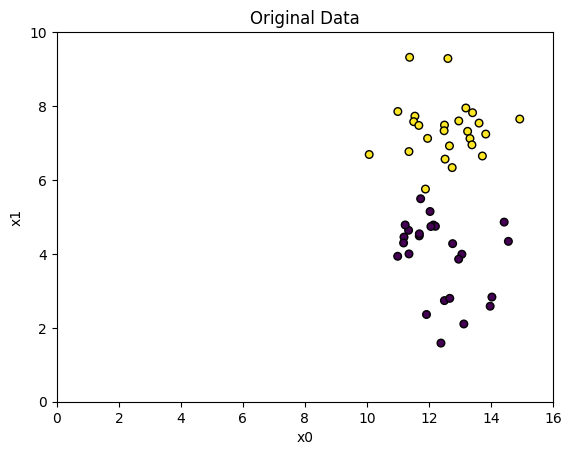

In [6]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

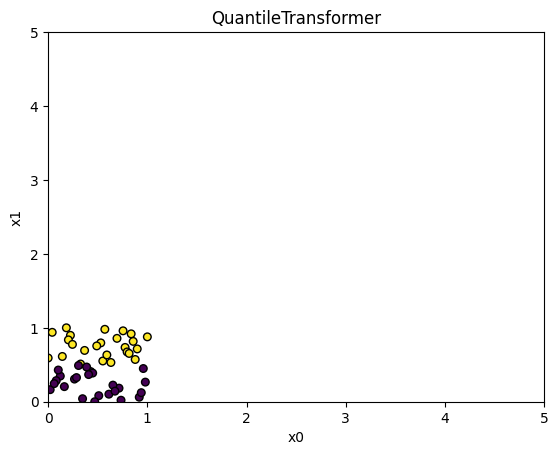

In [7]:
# QuantileTransformer 적용
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

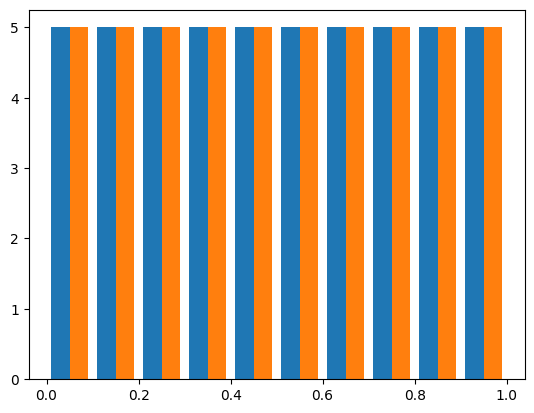

In [8]:
plt.hist(X_trans)
plt.show()

데이터 포인트들이 0과 1사이에 균등하게 분포되어 있다.

In [9]:
print(scaler.quantiles_.shape)  # (n_quantiles, n_features)

(50, 2)


In [11]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))     # 분위에 해당하는 샘플 추출

[ 0.  5.  8.  9. 10.]


In [12]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)   
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))   # 정규 분표로 변환되어 출력

[0.   0.25 0.5  0.75 1.  ]


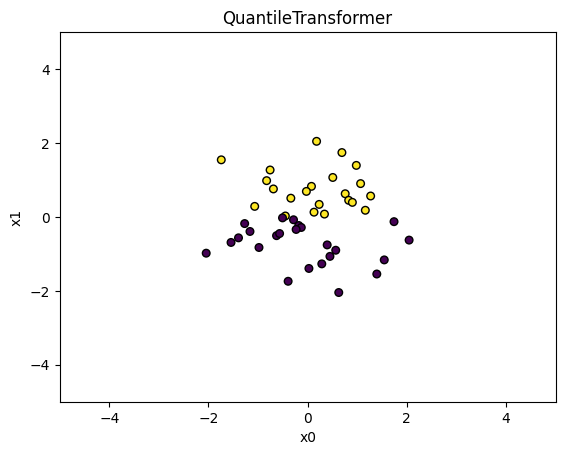

In [13]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

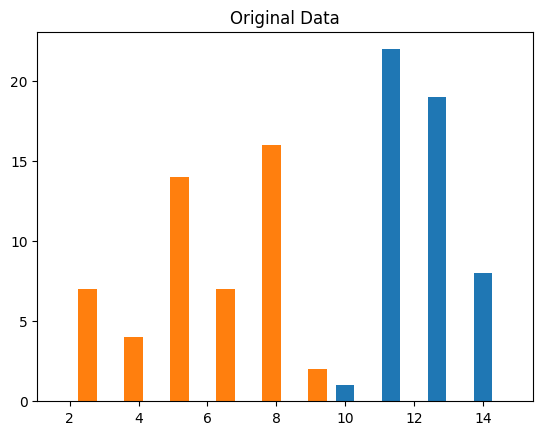

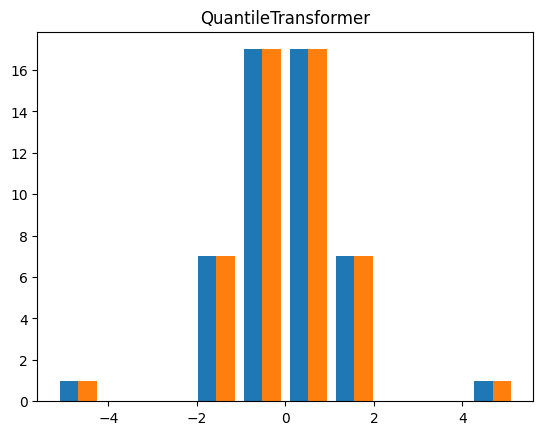

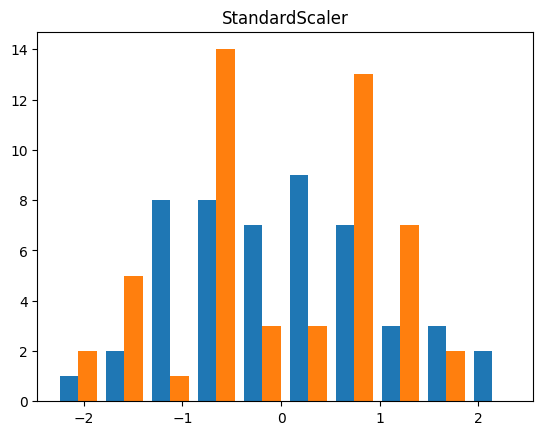

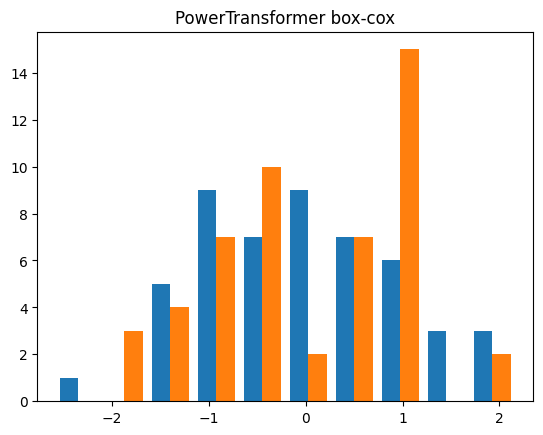

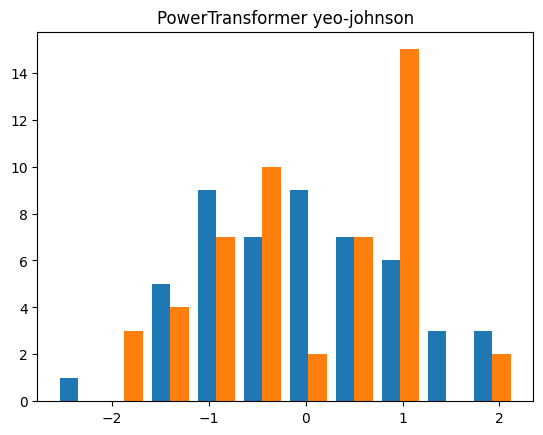

In [16]:
# QuantileTransformer, StandardScaler, PowerTransformer
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer box-cox")
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()

#### 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

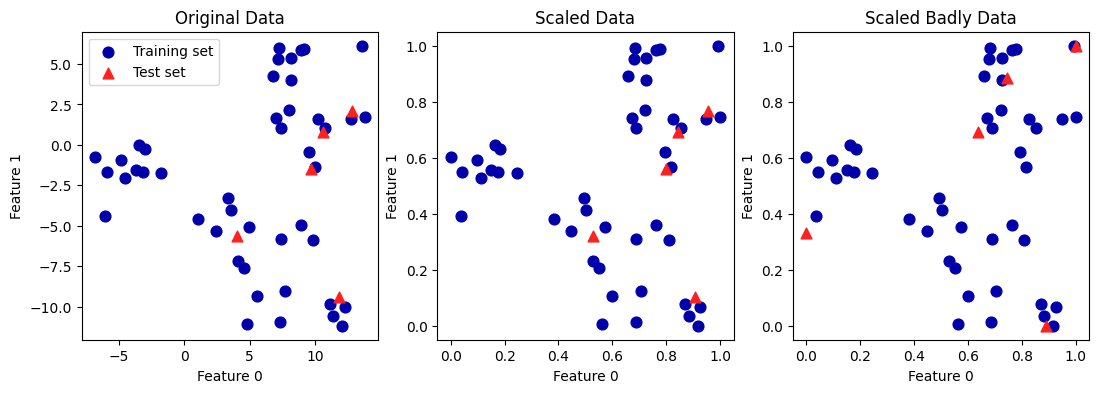

In [21]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 산점도 표현
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2.colors[1], marker='^', label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler 사용
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 산점도 표현
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='Test set', s=60)
axes[1].set_title("Scaled Data")

# 테스트 스케일을 따로 조정
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 산점도 표현
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label='Test set', s=60)
axes[2].set_title("Scaled Badly Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
plt.show()

원본 데이터와 비교했을 때 잘 스케일 조정된 데이터는 범위만 다를 뿐 원본 데이터와 똑같은 분포를 유지하고 있다.   
하지만 테스트 데이터만 따로 스케일 조정한 **잘못 스케일 조정된 데이터**는 그렇지 않은 모습을 보인다.

#### 3.3.5 지도 학습에서 데이터 전처리 효과

In [22]:
# cancer data로 svm 학습
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [24]:
# MinMaxScaler()로 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.95


스케일 조정 하나만으로 정확도가 꽤 상승한 것을 알 수 있다. -> **데이터 스케일의 중요성**

In [27]:
# StandardScaler 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 세트 정확도: 0.97


### 3.4 차원 축소, 특성 추출, 매니폴드 학습